In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns


### Flood Watch Data Analysis

In [2]:
dfFW = pd.read_csv('../data/FloodWatch.csv')
dfFW = dfFW.rename(columns={'please_enter_todays_date': 'Date','Count_objectid': 'Flood Count'})
dfFW['Date'] = pd.to_datetime(dfFW['Date'])
dfFW= dfFW[dfFW['Date'].dt.year > 2019]

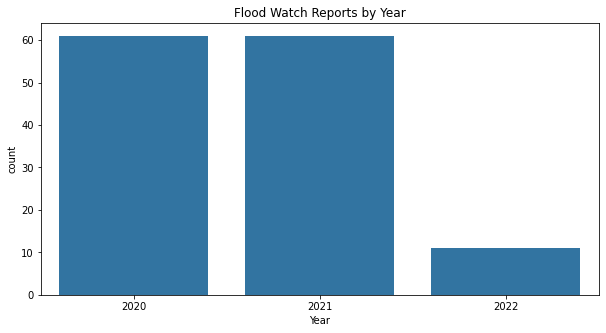

In [3]:
#Floodwatch reports by year
dfFW['Year'] = dfFW['Date'].dt.year

figure = plt.figure(figsize=(10,5))
figure = plt.title('Flood Watch Reports by Year')
figure = sns.countplot(x = dfFW['Year'], color= '#1f77b4')

Text(0.5, 0, 'Day of the Week')

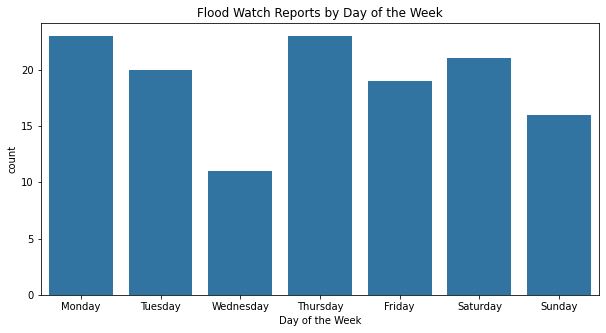

In [4]:
#Plotting Flood Watch Reports by Day of the week
dfFW['day'] = dfFW['Date'].dt.day_name()

plt.figure(figsize=(10,5))
order = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(x = dfFW['day'], color='#1f77b4',order=order)
plt.title('Flood Watch Reports by Day of the Week')
plt.xlabel('Day of the Week')


Text(0, 0.5, 'Flood Count')

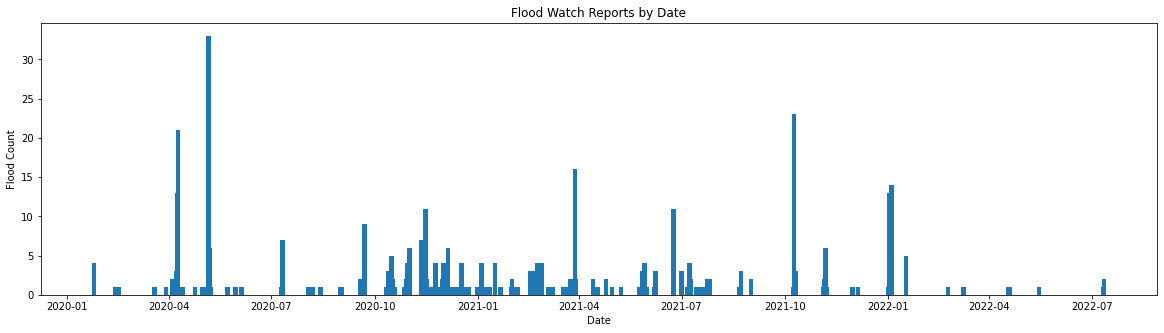

In [5]:
#Flood Watch Reports every day

plt.figure(figsize=(20,5))
plt.bar(x=dfFW['Date'], height = dfFW['Flood Count'], width = 4)
#sns.countplot(x=dfFW['Date'], color='#1f77b4')
plt.title('Flood Watch Reports by Date')
plt.xlabel('Date')
plt.ylabel('Flood Count')


Text(0.5, 0, 'Month')

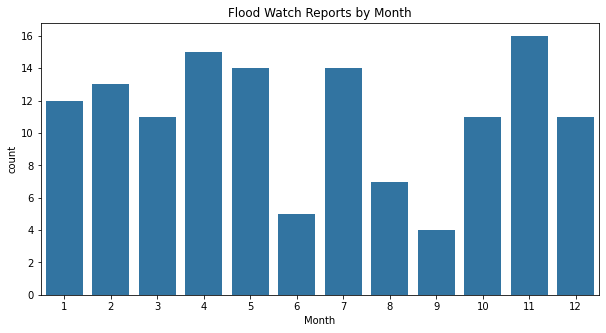

In [6]:
dfFW['month'] = dfFW['Date'].dt.month
plt.figure(figsize=(10,5))
sns.countplot(x=dfFW['month'], color='#1f77b4')
plt.title('Flood Watch Reports by Month')
plt.xlabel('Month')

### Russell Street Flood Watch Reports and Sensor Readings

In [7]:
dfSensor = pd.read_csv('../data/SensorFloods.csv')

In [8]:
dfRussellSt = pd.read_csv('../data/RussellStFloodWatch.csv')
dfRussellSt = dfRussellSt.rename(columns={'please_enter_todays_date': 'FW Date','Count_objectid': 'FW Count'})
dfRussellSt['FW Date'] = pd.to_datetime(dfRussellSt['FW Date'])
dfRussellSt= dfRussellSt[dfRussellSt['FW Date'].dt.year > 2019]
dfRussellSt['Year'] = dfRussellSt['FW Date'].dt.year

In [9]:
DepID = ['easily_dear_mouse','duly_pro_vervet']

for index, row in dfSensor.iterrows():
    if dfSensor['Deployment_id'][index] not in DepID:
        dfSensor = dfSensor.drop(index=index)

dfSensor['Start_time'] = pd.to_datetime(dfSensor['Start_time'])
dfSensor['Flood Date'] = pd.to_datetime(dfSensor['Start_time'].dt.date)
dfSensor['Year'] = dfSensor['Flood Date'].dt.year

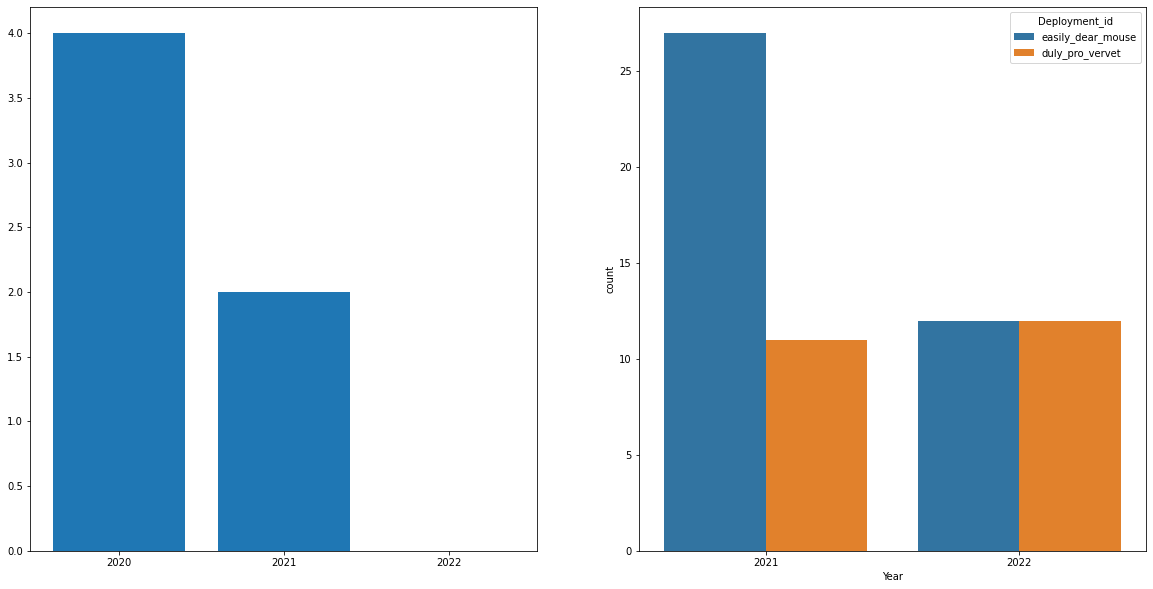

In [10]:
fig,array = plt.subplots(ncols=2, figsize=(20,10))
array[0].bar(x = ['2020', '2021','2022'], height = [4,2,0], width =0.8)
#fig = sns.countplot(x=dfRussellSt['Year'])
array[1] = sns.countplot(x=dfSensor['Year'],hue=dfSensor['Deployment_id'])


{2021: 38, 2022: 24}


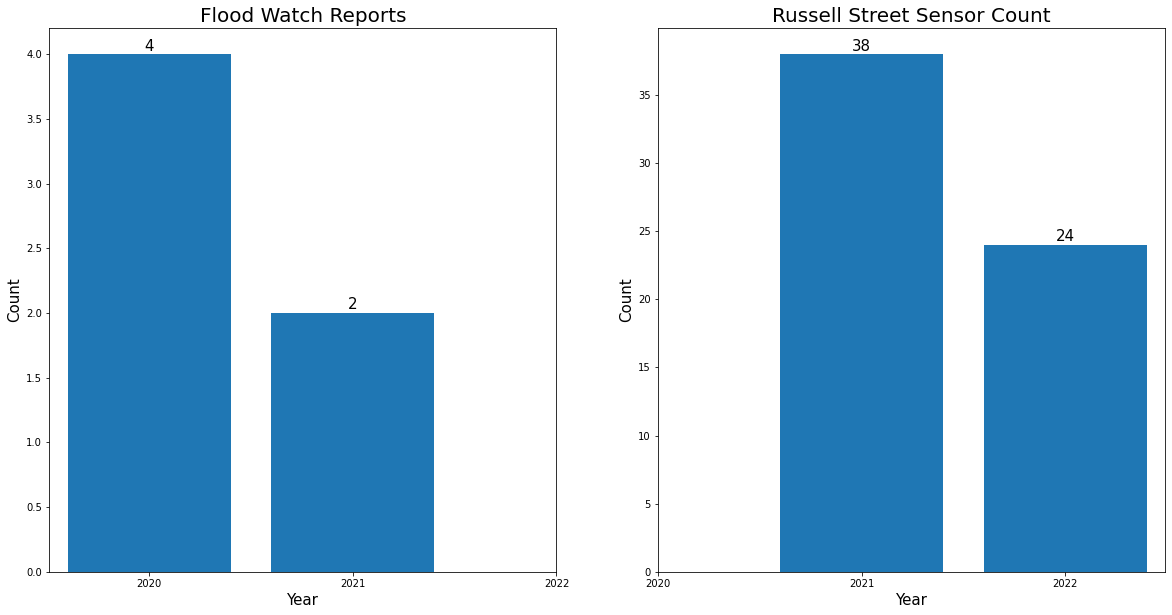

In [11]:
counts_by_yearFW = {}
for index, row in dfRussellSt.iterrows():
    if row['FW Date'].year not in counts_by_yearFW:
        counts_by_yearFW[row['FW Date'].year] = 1
    else:
        counts_by_yearFW[row['FW Date'].year] += 1

x = list(counts_by_yearFW.keys())
y = list(counts_by_yearFW.values())

counts_by_yearR = {}
for index, row in dfSensor.iterrows():
    if row['Start_time'].year not in counts_by_yearR:
        counts_by_yearR[row['Start_time'].year] = 1
    else:
        counts_by_yearR[row['Start_time'].year] += 1

print(counts_by_yearR)

x1 = list(counts_by_yearR.keys())
y1 = list(counts_by_yearR.values())

figure, array = plt.subplots(ncols=2, figsize=(20, 10))

array[0].bar(x,y)
array[0].set_title('Flood Watch Reports', fontsize=20)

array[1].bar(x1,y1)
array[1].set_title("Russell Street Sensor Count", fontsize=20)

for plot in array:
    plot.set_xlabel('Year', fontsize=15)
    plot.set_ylabel('Count', fontsize=15)
    for bar in plot.patches:
        plot.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    plot.set_xticks([2020, 2021, 2022])
    
    

### Beach 84th Sensors

In [12]:
df = pd.read_csv('../data/SensorFloods.csv')

DepID = ['daily_happy_satyr']

for index, row in df.iterrows():
    if df['Deployment_id'][index] not in DepID:
        df = df.drop(index=index)

df['Start_time'] = pd.to_datetime(df['Start_time'])
df['Flood Date'] = pd.to_datetime(df['Start_time'].dt.date)
df['Year'] = df['Flood Date'].dt.year

In [13]:
df84 = pd.read_csv('../data/Beach84thFloodWatch.csv')

In [14]:
#No flood watch complaints after the sensor in Beach 84th was deployed

### Davenport Ct

In [15]:
df = pd.read_csv('../data/SensorFloods.csv')

DepID = ['mildly_calm_ibex','mainly_fond_boar']

for index, row in df.iterrows():
    if df['Deployment_id'][index] not in DepID:
        df = df.drop(index=index)

df['Start_time'] = pd.to_datetime(df['Start_time'])
df['Flood Date'] = pd.to_datetime(df['Start_time'].dt.date)
df['Year'] = df['Flood Date'].dt.year

In [16]:
dfD = pd.read_csv('../data/DavenportCtFloodWatch.csv')
dfD = dfD.rename(columns={'please_enter_todays_date': 'Date','Count_objectid': 'Count'})
dfD['Date'] = pd.to_datetime(dfD['Date'])
dfD = dfD[dfD['Date'].dt.year > 2020]
dfD['Year'] = dfD['Date'].dt.year

{2021: 12, 2022: 8}


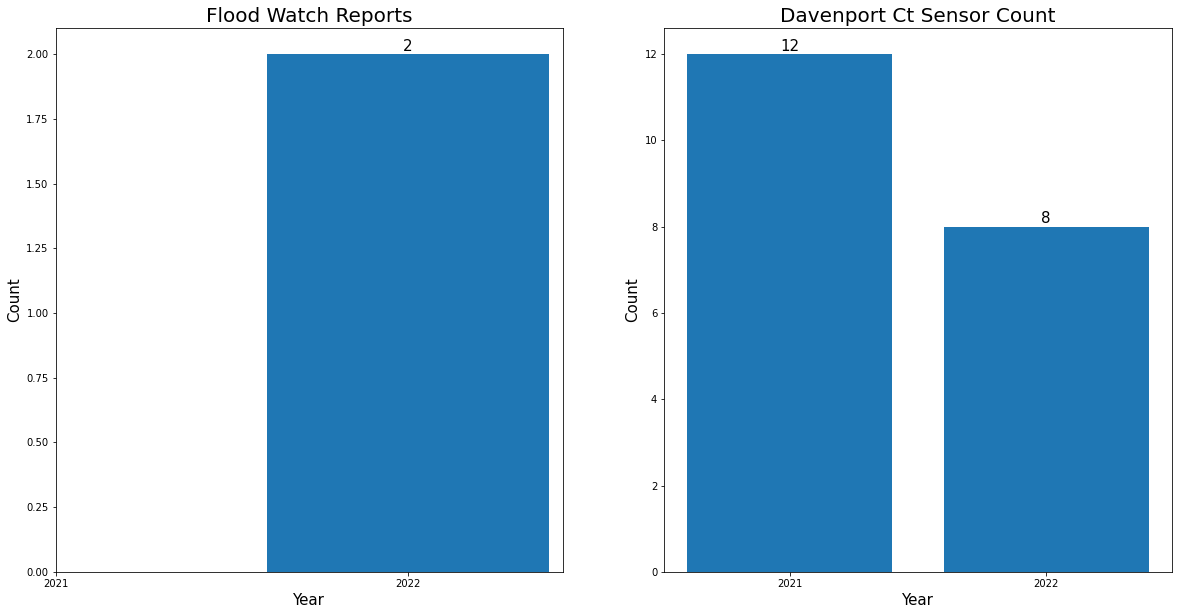

In [17]:
counts_by_yearFW = {}
for index, row in dfD.iterrows():
    if row['Date'].year not in counts_by_yearFW:
        counts_by_yearFW[row['Date'].year] = 1
    else:
        counts_by_yearFW[row['Date'].year] += 1

x = list(counts_by_yearFW.keys())
y = list(counts_by_yearFW.values())

counts_by_yearR = {}
for index, row in df.iterrows():
    if row['Start_time'].year not in counts_by_yearR:
        counts_by_yearR[row['Start_time'].year] = 1
    else:
        counts_by_yearR[row['Start_time'].year] += 1

print(counts_by_yearR)

x1 = list(counts_by_yearR.keys())
y1 = list(counts_by_yearR.values())

figure, array = plt.subplots(ncols=2, figsize=(20, 10))

array[0].bar(x,y)
array[0].set_title('Flood Watch Reports', fontsize=20)

array[1].bar(x1,y1)
array[1].set_title("Davenport Ct Sensor Count", fontsize=20)

for plot in array:
    plot.set_xlabel('Year', fontsize=15)
    plot.set_ylabel('Count', fontsize=15)
    for bar in plot.patches:
        plot.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    plot.set_xticks([2021, 2022])
    
    